In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')
import plotly.plotly as py
import plotly.graph_objs as go

from functools import reduce
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
# preparing the dataset 
df =pd.read_excel('2019 Radian Case Interview Data.xlsx')

In [3]:
df.head()

,STORE NUMBER,DIVISION,Market Area,SUB-REGION,TOTAL STORE SALES,Total Store Sq. Footage,Total Store Selling Sq Ft,ANNUAL BAKERY SALES,AVG WEEKLY BAKERY SALES,ANNAL BAKERY GROSS MARGIN,...,BAKERY DEPT. SIZE GROUP,"Coffee Shop Type (Front of Store, not in Bakery Dept.)",STORE TYPE (SCHEME A),STORE TYPE (SCHEME B),A-Discerning Diners,B-Good Lifers,C-Quick Fixers,D-Traditionalists,E-Urban Seekers,F-Budgeters
0,1,DIVISION 01,REGION 1,1,25051671.12,37440,21824,537176.06,10330.308846,314725.23,...,SMALL,None,1-Quality Places,2-Mid/Traditional,0.230706,0.090784,0.046249,0.306602,0.268462,0.057197
1,3,DIVISION 01,REGION 1,1,37256804.00,79436,48453,851926.89,16383.209423,489247.63,...,MEDIUM,Dunkin Donuts,2-Mainstream Markets,2-Mid/Traditional,0.184601,0.141916,0.075622,0.301760,0.210752,0.085349
2,5,DIVISION 01,REGION 1,1,21649459.79,78133,48220,599781.15,11534.252885,327419.16,...,LARGE,None,3-Savings Centers,2-Mid/Traditional,0.146546,0.085418,0.045554,0.367253,0.264162,0.091067
3,6,DIVISION 01,REGION 1,1,37771075.80,75391,45118,858674.28,16512.966923,499531.40,...,SMALL,Starbucks,1-Quality Places,2-Mid/Traditional,0.201927,0.140318,0.072568,0.302012,0.204857,0.078319
4,7,DIVISION 01,REGION 1,1,39641511.90,80125,48105,834844.29,16054.697885,479350.66,...,MEDIUM,Dunkin Donuts,1-Quality Places,2-Mid/Traditional,0.129740,0.143704,0.096409,0.305724,0.194539,0.129884


In [4]:
#changing the column names for smoother programming
columns=['storenumber', 'division', 'marketarea', 'subregion','totalstoresales', 'totalstoresfootage','totalstoresellingsqft', 'annualbakerysales',
       'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft',
       'bakerydeptsizegroup',
       'coffeshoptype_nb',
       'storetype_a', 'storetype_b',
       'a_dd', 'b_gl', 'c_qf',
       'd_t', 'e-us', 'f_b']

df.columns=columns

In [5]:
def normalize(df,columns):
    for each in columns:
        df[each]=df[each]-(df[each].mean())/df[each].std()
    return df

In [6]:
#sales analysis [don't run before adding all the columns]
sales=df[['division','marketarea','subregion','totalstoresales','totalstoresfootage','totalstoresellingsqft','annualbakerysales','avgweeklybakerysales','annualbakerygrossmargin','bakerysellingsqft']]

In [7]:


#storeseg
storesegmcustprof=['storenumber','bakerydeptsizegroup','coffeshoptype_nb','storetype_a', 'storetype_b','a_dd', 'b_gl', 'c_qf','d_t', 'e-us', 'f_b']
storesegmcustprof=df[storesegmcustprof]

In [8]:
sales=df[['storenumber','division','totalstoresales','totalstoresfootage','totalstoresellingsqft']]




In [9]:
tempbak=df[['storenumber', 'division', 'marketarea', 'subregion','annualbakerysales', 'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft']]

tempbak['MC']=tempbak['annualbakerysales']-tempbak['annualbakerygrossmargin']
tempbak['MC+LC']=tempbak['MC']+tempbak['annualbakerydirectpayrollcosts']


tempbak['AC']=tempbak['annualbakerygrossmargin']-tempbak['annualbakerydirectpayrollcosts']\
-tempbak['annualbakerynetoperatingearnings']

tempbak['CM']=tempbak['annualbakerygrossmargin']-tempbak['annualbakerydirectpayrollcosts']

tempbak['totspent']=tempbak['MC+LC']+tempbak['AC']

tempbak['breakeven']=tempbak['annualbakerysales']-tempbak['annualbakerynetoperatingearnings']


tempbak['profitablestore']=tempbak['annualbakerynetoperatingearnings']>0

In [10]:
sales=sales[['storenumber','division','totalstoresales','totalstoresfootage','totalstoresellingsqft']]
tempbak=tempbak[['storenumber','MC','annualbakerydirectpayrollcosts','AC','annualbakerysales','totspent','annualbakerynetoperatingearnings',\
         'annualbakerygrossmargin','CM', 'breakeven', 'profitablestore','bakerysellingsqft']]


In [11]:
tempbak.head()

,storenumber,MC,annualbakerydirectpayrollcosts,AC,annualbakerysales,totspent,annualbakerynetoperatingearnings,annualbakerygrossmargin,CM,breakeven,profitablestore,bakerysellingsqft
0,1,222450.83,123972.63,188165.25,537176.06,534588.71,2587.35,314725.23,190752.60,534588.71,True,922
1,3,362679.26,152187.69,294663.95,851926.89,809530.90,42395.99,489247.63,337059.94,809530.90,True,1534
2,5,272361.99,130792.52,182399.27,599781.15,585553.78,14227.37,327419.16,196626.64,585553.78,True,1868
3,6,359142.88,181150.01,304841.17,858674.28,845134.06,13540.22,499531.40,318381.39,845134.06,True,1129
4,7,355493.63,182483.90,247287.19,834844.29,785264.72,49579.57,479350.66,296866.76,785264.72,True,1462


In [12]:
newdf=[sales,tempbak,storesegmcustprof]

In [13]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='storenumber'), newdf)

In [14]:
#intcolumns=['totalstoresales','totalstoresfootage','totalstoresellingsqft','annualbakerysales','avgweeklybakerysales','annualbakerygrossmargin','bakerysellingsqft']

#sales[intcolumns] = sales[intcolumns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [15]:
print(df_final.columns)
df_final.head()

Index(['storenumber', 'division', 'totalstoresales', 'totalstoresfootage',
       'totalstoresellingsqft', 'MC', 'annualbakerydirectpayrollcosts', 'AC',
       'annualbakerysales', 'totspent', 'annualbakerynetoperatingearnings',
       'annualbakerygrossmargin', 'CM', 'breakeven', 'profitablestore',
       'bakerysellingsqft', 'bakerydeptsizegroup', 'coffeshoptype_nb',
       'storetype_a', 'storetype_b', 'a_dd', 'b_gl', 'c_qf', 'd_t', 'e-us',
       'f_b'],
      dtype='object')


,storenumber,division,totalstoresales,totalstoresfootage,totalstoresellingsqft,MC,annualbakerydirectpayrollcosts,AC,annualbakerysales,totspent,...,bakerydeptsizegroup,coffeshoptype_nb,storetype_a,storetype_b,a_dd,b_gl,c_qf,d_t,e-us,f_b
0,1,DIVISION 01,25051671.12,37440,21824,222450.83,123972.63,188165.25,537176.06,534588.71,...,SMALL,None,1-Quality Places,2-Mid/Traditional,0.230706,0.090784,0.046249,0.306602,0.268462,0.057197
1,3,DIVISION 01,37256804.00,79436,48453,362679.26,152187.69,294663.95,851926.89,809530.90,...,MEDIUM,Dunkin Donuts,2-Mainstream Markets,2-Mid/Traditional,0.184601,0.141916,0.075622,0.301760,0.210752,0.085349
2,5,DIVISION 01,21649459.79,78133,48220,272361.99,130792.52,182399.27,599781.15,585553.78,...,LARGE,None,3-Savings Centers,2-Mid/Traditional,0.146546,0.085418,0.045554,0.367253,0.264162,0.091067
3,6,DIVISION 01,37771075.80,75391,45118,359142.88,181150.01,304841.17,858674.28,845134.06,...,SMALL,Starbucks,1-Quality Places,2-Mid/Traditional,0.201927,0.140318,0.072568,0.302012,0.204857,0.078319
4,7,DIVISION 01,39641511.90,80125,48105,355493.63,182483.90,247287.19,834844.29,785264.72,...,MEDIUM,Dunkin Donuts,1-Quality Places,2-Mid/Traditional,0.129740,0.143704,0.096409,0.305724,0.194539,0.129884


In [16]:
df_final.describe()

,storenumber,totalstoresales,totalstoresfootage,totalstoresellingsqft,MC,annualbakerydirectpayrollcosts,AC,annualbakerysales,totspent,annualbakerynetoperatingearnings,annualbakerygrossmargin,CM,breakeven,bakerysellingsqft,a_dd,b_gl,c_qf,d_t,e-us,f_b
count,515.000000,5.150000e+02,515.000000,515.000000,515.000000,515.000000,515.000000,5.150000e+02,5.150000e+02,515.000000,515.000000,515.000000,5.150000e+02,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,472.627184,3.028696e+07,62329.289320,40537.291262,287087.342155,163527.535709,239499.286951,6.450465e+05,6.901142e+05,-45067.627922,357959.194738,194431.659029,6.901142e+05,1555.634951,0.188515,0.097023,0.139787,0.268199,0.214049,0.092427
std,258.457865,1.068662e+07,15939.502769,9161.222875,94492.806807,41786.628092,65358.208769,2.363694e+05,1.858828e+05,81727.290659,143191.168840,114154.388423,1.858828e+05,454.669546,0.061980,0.040866,0.106654,0.095672,0.071136,0.022841
min,1.000000,8.538922e+06,18800.000000,12802.000000,68649.880000,59050.150000,76261.730000,1.396123e+05,2.237419e+05,-298688.890000,70962.430000,-34787.520000,2.237419e+05,96.000000,0.047164,0.008560,0.026928,0.067794,0.076433,0.037808
25%,251.500000,2.273488e+07,52406.000000,35462.500000,222305.850000,135627.515000,197885.270000,4.773141e+05,5.697350e+05,-101779.230000,256210.550000,111677.840000,5.697350e+05,1334.000000,0.140346,0.068395,0.062814,0.180568,0.164864,0.075094
50%,512.000000,2.961355e+07,63171.000000,41792.000000,279146.510000,158567.820000,239954.390000,6.300474e+05,6.802452e+05,-52396.130000,347221.240000,182726.000000,6.802452e+05,1540.000000,0.184182,0.094869,0.080792,0.305994,0.207222,0.091123
75%,687.500000,3.644856e+07,76190.500000,47740.000000,349332.525000,186959.975000,281594.705000,7.936198e+05,8.082559e+05,1046.700000,442027.265000,263022.910000,8.082559e+05,1755.500000,0.232390,0.124888,0.248437,0.344085,0.256299,0.109258
max,897.000000,7.085517e+07,109348.000000,57675.000000,737640.690000,375280.870000,445927.060000,1.731235e+06,1.552759e+06,315380.260000,993594.110000,662416.400000,1.552759e+06,4333.000000,0.384614,0.243923,0.386982,0.424464,0.545361,0.160570


In [17]:
# total store sales and total bakery sales
pie = pd.DataFrame(columns=['SalesIndex', 'values'])

In [18]:
pie=pie.append({'SalesIndex':'TotalStoreSales','values':df_final.totalstoresales.sum()},ignore_index=True)
pie=pie.append({'SalesIndex':'annualbakerysales','values':df_final.annualbakerysales.sum()},ignore_index=True)

In [19]:
pie.iplot(kind='pie',labels='SalesIndex',values='values',pull=0.5,hole=0.1)

In [20]:
# avg store sales and avg bakery sales
avgpie = pd.DataFrame(columns=['SalesIndex', 'values'])
avgpie=avgpie.append({'SalesIndex':'avgTotalStoreSales','values':df_final.totalstoresales.mean()},ignore_index=True)
avgpie=avgpie.append({'SalesIndex':'avgannualbakerysales','values':df_final.annualbakerysales.mean()},ignore_index=True)

avgpie.iplot(kind='pie',labels='SalesIndex',values='values',pull=0.5,hole=0.1)

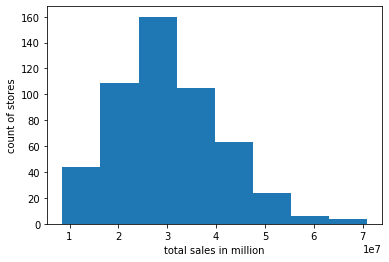

In [21]:
# range of variabilty for total store sales
# find optimum number of bins
from scipy.stats import kurtosis
doanes = lambda data: int(1+np.log(len(data)))+np.log(1+kurtosis(data)*(len(data)/6.)**0.5)
bins=(int(doanes(df_final.totalstoresales)))
plt.hist(df_final.totalstoresales,bins=bins)
plt.xlabel('total sales in million')
plt.ylabel('count of stores')
plt.show()

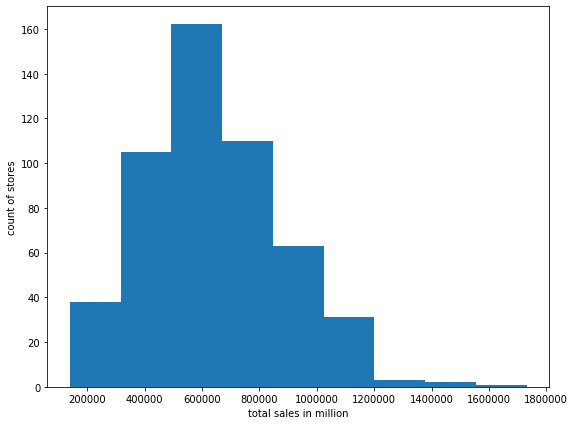

In [22]:
# range of variabilty for total bakery sales
# find optimum number of bins
from scipy.stats import kurtosis
doanes = lambda data: int(1+np.log(len(data)))+np.log(1+kurtosis(data)*(len(data)/6.)**0.5)
bins=(int(doanes(df_final.annualbakerysales)))
fig,ax =plt.subplots(figsize=(9,7))
ax.hist(df_final.annualbakerysales,bins=bins)
plt.xlabel('total sales in million')
plt.ylabel('count of stores')
plt.show()

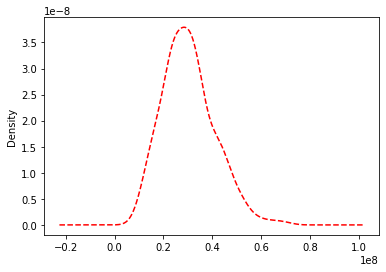

In [23]:
# density plot
df_final.totalstoresales.plot(kind='kde',style='r--')

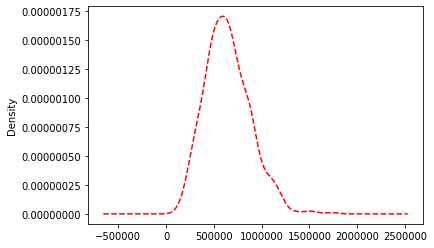

In [24]:
df_final.annualbakerysales.plot(kind='kde',style='r--')

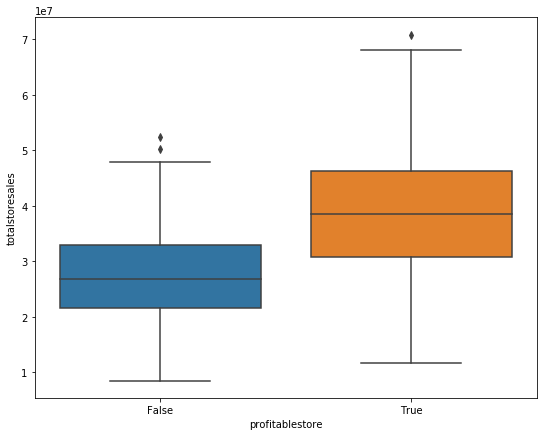

In [25]:
fig,ax =plt.subplots(figsize=(9,7))
sns.boxplot(ax=ax,x='profitablestore',y='totalstoresales',data=df_final)

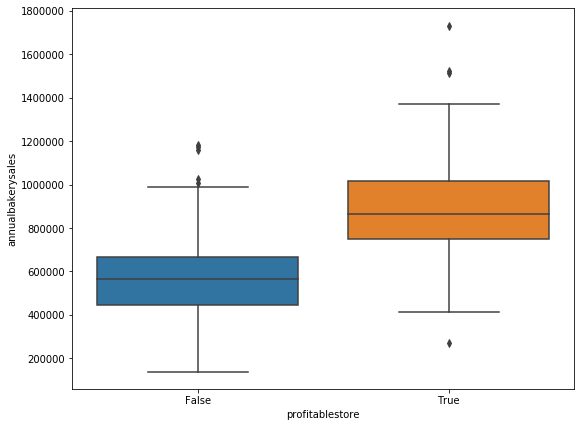

In [26]:
fig,ax =plt.subplots(figsize=(9,7))
sns.boxplot(ax=ax,x='profitablestore',y='annualbakerysales',data=df_final)

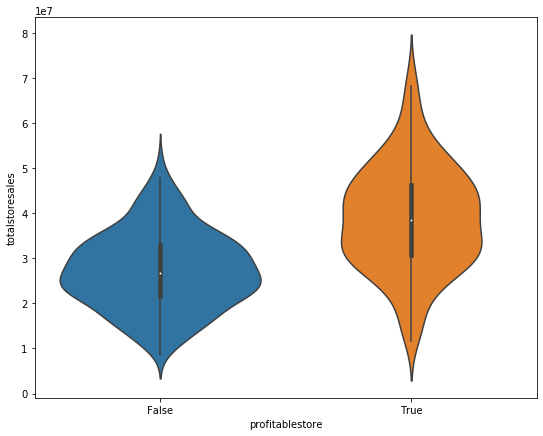

In [27]:
fig,ax =plt.subplots(figsize=(9,7))
sns.violinplot(ax=ax,x='profitablestore',y='totalstoresales',data=df_final)

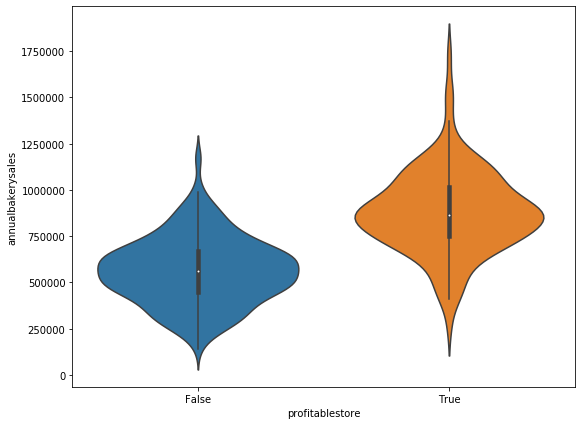

In [28]:
#viloin plots 
fig,ax =plt.subplots(figsize=(9,7))
sns.violinplot(ax=ax,x='profitablestore',y='annualbakerysales',data=df_final)

In [29]:
#Does size matter
df_final.columns

Index(['storenumber', 'division', 'totalstoresales', 'totalstoresfootage',
       'totalstoresellingsqft', 'MC', 'annualbakerydirectpayrollcosts', 'AC',
       'annualbakerysales', 'totspent', 'annualbakerynetoperatingearnings',
       'annualbakerygrossmargin', 'CM', 'breakeven', 'profitablestore',
       'bakerysellingsqft', 'bakerydeptsizegroup', 'coffeshoptype_nb',
       'storetype_a', 'storetype_b', 'a_dd', 'b_gl', 'c_qf', 'd_t', 'e-us',
       'f_b'],
      dtype='object')

In [30]:
# before putting the storesales and footage let's scale the features to bring them on one scale
sales=df_final[['totalstoresales','totalstoresfootage','totalstoresellingsqft','annualbakerysales','annualbakerygrossmargin','bakerysellingsqft','profitablestore']]



In [31]:
intcolumns=['totalstoresales','totalstoresfootage','totalstoresellingsqft','annualbakerysales','annualbakerygrossmargin','bakerysellingsqft']
sales[intcolumns] = sales[intcolumns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))



Text(0, 0.5, 'total store sales')

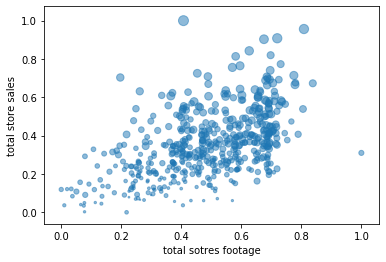

In [32]:
# it's a 3d plot with points on bakery sales

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(sales.totalstoresfootage, sales.totalstoresales,s=sales.annualbakerysales*100, marker='o',alpha=0.5)

ax.set_xlabel('total sotres footage')
ax.set_ylabel('total store sales')

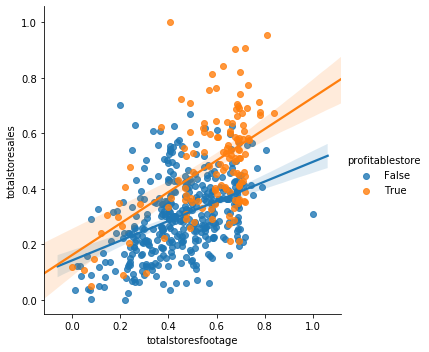

In [33]:
#totalstores sales on totalstorefootage
#What impact does store square footage and store sales volume have on bakery department sales? 

sns.lmplot('totalstoresfootage','totalstoresales',data=sales,hue='profitablestore',fit_reg=True)


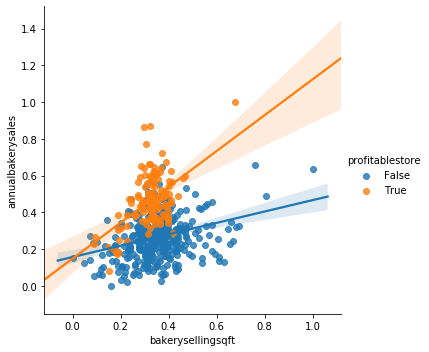

In [34]:
#annualbakerysales
#What impact does bakery square footage have on bakery department sales?  Are larger bakeries better?

sns.lmplot('bakerysellingsqft','annualbakerysales',data=sales,hue='profitablestore',fit_reg=True)


In [35]:
#What drives bakery department sales?  
#totalstoresales and totalbakerysize


In [36]:
# section 2

pas=df_final

pa=[ 'MC', 'annualbakerydirectpayrollcosts',
       'annualbakerysales', 'CM']
pas[pa] = df_final[pa].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

<Figure size 1800x1440 with 0 Axes>

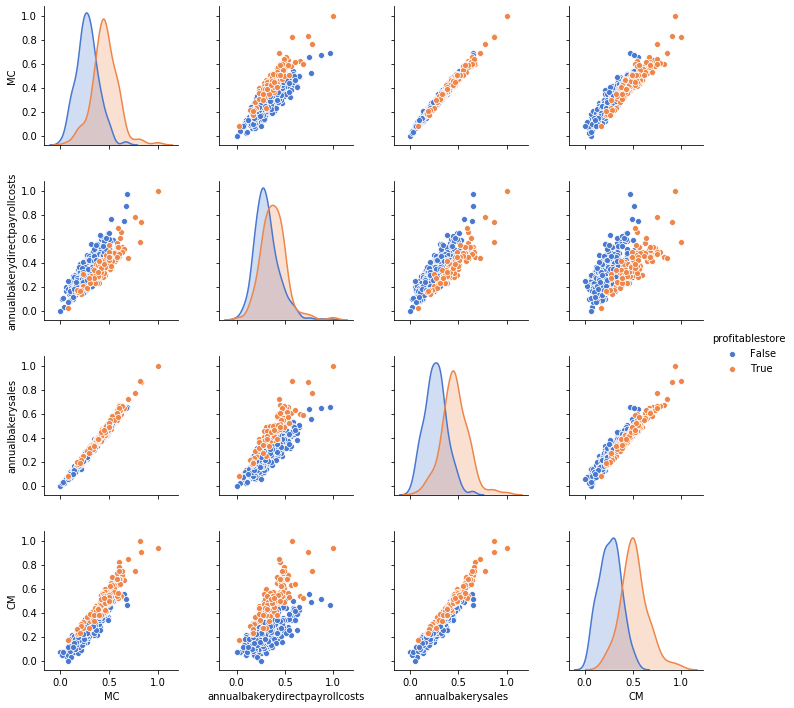

In [37]:
plt.figure(figsize=(25,20))
sns.pairplot(pas,vars=pa,hue='profitablestore',palette='muted')

In [38]:
# section 3
#What roles do Materials, Labor and Allocations (all other store costs) have on Operating Earnings?  Why?

roles=df_final

MLA=[ 'MC', 'annualbakerydirectpayrollcosts',
       'annualbakerynetoperatingearnings', 'CM','AC']
roles[MLA] = df_final[MLA].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [44]:
roles.head()

,storenumber,division,totalstoresales,totalstoresfootage,totalstoresellingsqft,MC,annualbakerydirectpayrollcosts,AC,annualbakerysales,totspent,...,bakerydeptsizegroup,coffeshoptype_nb,storetype_a,storetype_b,a_dd,b_gl,c_qf,d_t,e-us,f_b
0,1,DIVISION 01,25051671.12,37440,21824,0.229900,0.205301,0.302716,0.249785,534588.71,...,SMALL,None,1-Quality Places,2-Mid/Traditional,0.230706,0.090784,0.046249,0.306602,0.268462,0.057197
1,3,DIVISION 01,37256804.00,79436,48453,0.439512,0.294524,0.590811,0.447540,809530.90,...,MEDIUM,Dunkin Donuts,2-Mainstream Markets,2-Mid/Traditional,0.184601,0.141916,0.075622,0.301760,0.210752,0.085349
2,5,DIVISION 01,21649459.79,78133,48220,0.304507,0.226867,0.287118,0.289119,585553.78,...,LARGE,None,3-Savings Centers,2-Mid/Traditional,0.146546,0.085418,0.045554,0.367253,0.264162,0.091067
3,6,DIVISION 01,37771075.80,75391,45118,0.434226,0.386110,0.618342,0.451779,845134.06,...,SMALL,Starbucks,1-Quality Places,2-Mid/Traditional,0.201927,0.140318,0.072568,0.302012,0.204857,0.078319
4,7,DIVISION 01,39641511.90,80125,48105,0.428771,0.390328,0.462649,0.436807,785264.72,...,MEDIUM,Dunkin Donuts,1-Quality Places,2-Mid/Traditional,0.129740,0.143704,0.096409,0.305724,0.194539,0.129884


Text(0, 0.5, 'tot stor footage')

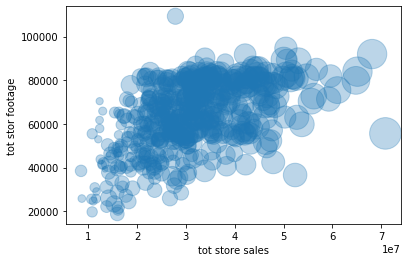

In [52]:
plt.scatter(roles.totalstoresales, roles.totalstoresfootage,s=roles.annualbakerysales*1000, marker='o',alpha=0.3,cmap='viridis')
plt.xlabel('tot store sales')
plt.ylabel('tot stor footage')
#plt.colorbar()

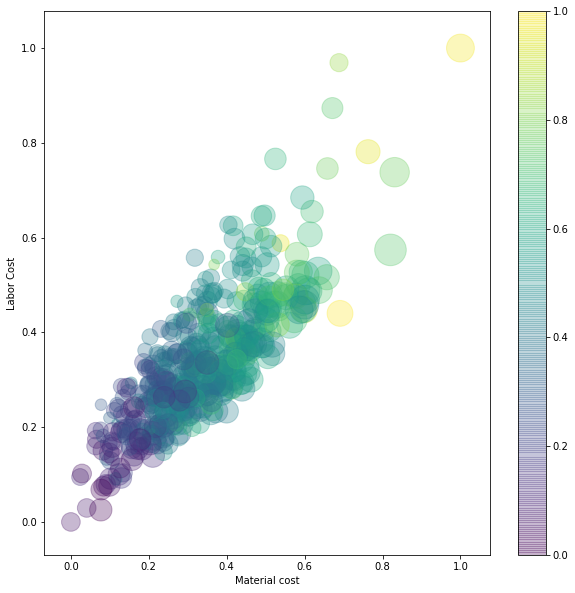

In [39]:
plt.figure(figsize=(10,10))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



plt.scatter(roles.MC, roles.annualbakerydirectpayrollcosts,s=roles.annualbakerynetoperatingearnings*1000,c=roles.AC, marker='o',alpha=0.3,cmap='viridis')
plt.xlabel('Material cost')
plt.ylabel('Labor Cost')
plt.colorbar()

In [40]:
#customer segmnetation


cols=['annualbakerysales','annualbakerynetoperatingearnings','profitablestore','bakerydeptsizegroup', 'coffeshoptype_nb',
       'storetype_a', 'storetype_b', 'a_dd', 'b_gl', 'c_qf', 'd_t', 'e-us',
       'f_b']

sales=df_final[['totalstoresales','totalstoresfootage','totalstoresellingsqft','annualbakerysales','annualbakerygrossmargin','bakerysellingsqft','profitablestore']]



In [41]:
sc=df_final[cols]
intcolumns=['annualbakerysales','annualbakerynetoperatingearnings']
sc[intcolumns] = df_final[intcolumns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

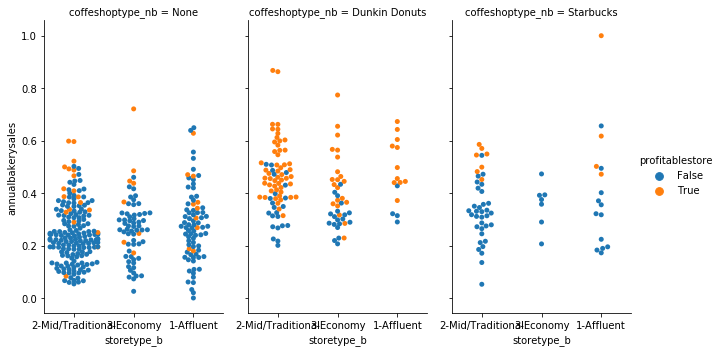

In [42]:
sns.catplot(x="storetype_b", y="annualbakerysales", hue="profitablestore",
            col="coffeshoptype_nb", aspect=.6,
            kind="swarm", data=sc);

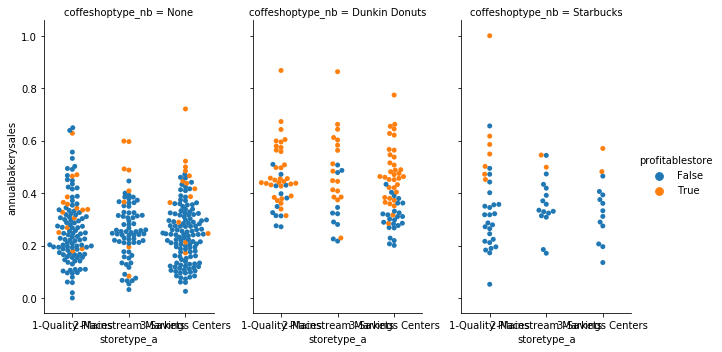

In [43]:
sns.catplot(x="storetype_a", y="annualbakerysales", hue="profitablestore",
            col="coffeshoptype_nb", aspect=.6,
            kind="swarm", data=sc);